In [62]:
# Data analysis
import pandas as pd
import numpy as np
from scipy import stats, integrate

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
%matplotlib inline  

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [15]:
train = pd.read_csv('digits/train.csv', nrows=10)

In [16]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


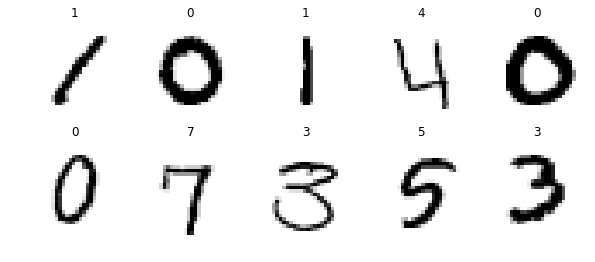

In [17]:
# Display the first 'n' images of a data set
f = plt.figure(figsize=(10,4))
# Loop over the images of the training set
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    ax.axis('off')
    image = train.iloc[i, 1:].values.reshape(28, 28)
    ax.set_title(train['label'].iloc[i])
    imgplot = plt.imshow(image, cmap='binary')

plt.show()

In [19]:
# Load images in memory
train = pd.read_csv('digits/train.csv', nrows=10000)
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:, 1:].values).astype('float32') # Pixel intensities of the images
X_test = (pd.read_csv('digits/test.csv').values).astype('float32')

y_train = np_utils.to_categorical(labels) # Labels as categories

# Convert images to black and white
#X_train[X_train > 0] = 1
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

# Split data for training and validation.
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=1)

print('X_train shape:', X_train.shape, '| y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape, '| y_val shape:', y_val.shape)

X_train shape: (8000, 784) | y_train shape: (8000, 10)
X_val shape: (2000, 784) | y_val shape: (2000, 10)


In [20]:
# Instantiate the MLP classifier
clf = MLPClassifier(solver='lbfgs', # Limited-memory BFGS optimizer
                    activation='relu', # Rectified linear unit as activation function, returns f(x) = max(0, x)
                    hidden_layer_sizes=(500, ) # One hidden layer of 500 nodes 
                   )

# Fit the model on the training set
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
# Run prediction on the validation set 
y_pred = clf.predict(X_val)

# Print results
print('Classification report:\n\n', classification_report(y_val, y_pred), '\n')

Classification report:

              precision    recall  f1-score   support

          0       0.99      0.97      0.98       205
          1       0.97      0.97      0.97       196
          2       0.94      0.96      0.95       227
          3       0.97      0.95      0.96       206
          4       0.95      0.95      0.95       201
          5       0.97      0.95      0.96       157
          6       0.98      0.95      0.97       207
          7       0.96      0.94      0.95       221
          8       0.91      0.95      0.93       184
          9       0.96      0.92      0.94       196

avg / total       0.96      0.95      0.95      2000
 



In [22]:
# Insert our prediction in a DataFrame with the ImageId
y_pred = y_pred.argmax(1)
predictions = pd.DataFrame({'ImageId': list(range(1, y_pred.size+1)), 
                            'Label': y_pred.astype(int)}
                     )
print('Completed prediction of {} images'.format(predictions.shape[0]))

Completed prediction of 2000 images


In [26]:
input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_train, y_train, 
          nb_epoch=10, 
          batch_size=16, 
          validation_split=0.2, 
#          show_accuracy=True, 
          verbose=2)
print('------------------------------\n')
print("Training complete.")

Training...


/Users/millenium/anaconda/envs/homework1/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 6400 samples, validate on 1600 samples
Epoch 1/10
 - 8s - loss: 0.6892 - val_loss: 0.3788
Epoch 2/10
 - 6s - loss: 0.3423 - val_loss: 0.2971
Epoch 3/10
 - 6s - loss: 0.2582 - val_loss: 0.2823
Epoch 4/10
 - 7s - loss: 0.2092 - val_loss: 0.2438
Epoch 5/10
 - 6s - loss: 0.1910 - val_loss: 0.2270
Epoch 6/10
 - 6s - loss: 0.1597 - val_loss: 0.2107
Epoch 7/10
 - 7s - loss: 0.1419 - val_loss: 0.2457
Epoch 8/10
 - 7s - loss: 0.1320 - val_loss: 0.2720
Epoch 9/10
 - 7s - loss: 0.1139 - val_loss: 0.2422
Epoch 10/10
 - 7s - loss: 0.1089 - val_loss: 0.2272
------------------------------

Training complete.


In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [27]:
print("Generating test predictions...")
y_pred = model.predict_classes(X_test, verbose=0)
#print("Complete.")

predictions = pd.DataFrame({'ImageId': list(range(1, y_pred.size+1)), 
                            'Label': y_pred.astype(int)})
print('Completed prediction of {} images'.format(predictions.shape[0]))

Generating test predictions...
Completed prediction of 28000 images


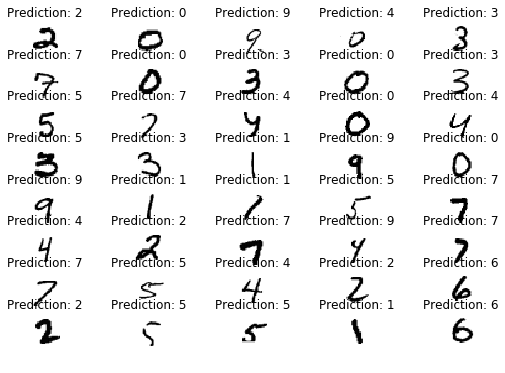

In [28]:
# Create figure
fig = plt.figure(figsize=(9,6))

# Loop over some images of the test set
for i in range(40):
    ax = plt.subplot(8, 5, i+1)
    ax.set_title('Prediction: {}'.format(predictions.iloc[i].Label))
    ax.axis('off')
    image = X_test[i].reshape(28, 28)
    imgplot = plt.imshow(image, cmap='binary')

plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
y_pred_val = model.predict_classes(X_val, verbose=0)
y_val_cat = y_val.argmax(axis=1)

conf_mat = confusion_matrix(y_val_cat, y_pred_val)
conf_mat

array([[202,   0,   0,   0,   0,   2,   0,   0,   1,   0],
       [  0, 191,   0,   1,   0,   1,   0,   0,   2,   1],
       [  0,   0, 218,   0,   0,   0,   2,   5,   2,   0],
       [  1,   0,   3, 190,   0,   6,   1,   1,   3,   1],
       [  0,   1,   0,   0, 189,   1,   4,   0,   1,   5],
       [  0,   1,   0,   1,   0, 152,   2,   0,   0,   1],
       [  0,   0,   0,   0,   1,   0, 206,   0,   0,   0],
       [  0,   2,   2,   1,   2,   0,   1, 204,   1,   8],
       [  0,   2,   2,   3,   1,   7,   5,   0, 164,   0],
       [  0,   1,   1,   3,   7,   2,   2,   3,   4, 173]])

Confusion matrix, without normalization
[[202   0   0   0   0   2   0   0   1   0]
 [  0 191   0   1   0   1   0   0   2   1]
 [  0   0 218   0   0   0   2   5   2   0]
 [  1   0   3 190   0   6   1   1   3   1]
 [  0   1   0   0 189   1   4   0   1   5]
 [  0   1   0   1   0 152   2   0   0   1]
 [  0   0   0   0   1   0 206   0   0   0]
 [  0   2   2   1   2   0   1 204   1   8]
 [  0   2   2   3   1   7   5   0 164   0]
 [  0   1   1   3   7   2   2   3   4 173]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.97 0.   0.01 0.   0.01 0.   0.   0.01 0.01]
 [0.   0.   0.96 0.   0.   0.   0.01 0.02 0.01 0.  ]
 [0.   0.   0.01 0.92 0.   0.03 0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.94 0.   0.02 0.   0.   0.02]
 [0.   0.01 0.   0.01 0.   0.97 0.01 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.01 0.01 0.   0.01 0.   0.   0.92 0.   0.04]
 [0.   0.01 0.01 0.02 0.01 0.04 0.03 0.   0.89 0.  ]
 [0.   0.01 0.01 0.02 0.

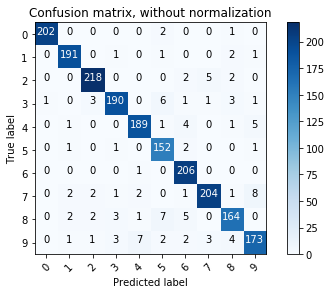

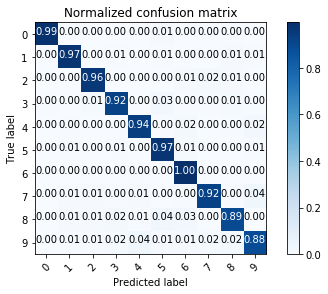

In [66]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_val_cat, y_pred_val)
np.set_printoptions(precision=2)

class_names = list(range(10))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()